In [1]:
import random

In [129]:
from tqdm import tqdm
import matplotlib.pyplot as plt
import networkx as nx

# Якийсь текст і + латех

In [243]:
class Graph:
    def __init__(self):
        self.nodes = set()
        self.edges = []
        self.adjacency_matrix = []
        self.adjacency_list = {}

    def add_vertex(self, node):
        if node not in self.nodes:
            self.nodes.add(node)

    def add_edge(self, node1, node2):
        if node1 in self.nodes and node2 in self.nodes:
            if not self.is_cyclic_with_edge(node1, node2):
                self.edges.append((node1, node2))
        else:
            print("One or both of the nodes are not in the graph.")

    def is_cyclic_with_edge(self, node1, node2):
        visited = set()
        stack = [(node1, -1)]

        while stack:
            node, parent = stack.pop()
            if node in visited:
                return True
            visited.add(node)
            for neighbor in self.get_neighbors(node):
                if neighbor != parent:
                    stack.append((neighbor, node))
        return False

    def get_neighbors(self, node):
        neighbours = []
        if node not in self.nodes:
            raise Exception("Node not in graph")
        for edge in self.edges:
            if node == edge[0]:
                neighbours.append(edge[1])
        return neighbours

    def create_adjacency_matrix(self):
        
        nodes_list = list(self.nodes)
        matrix = [[0 for _ in range(len(nodes_list))] for _ in range(len(nodes_list))]
        for edge in self.edges:
            i = nodes_list.index(edge[0])
            j = nodes_list.index(edge[1])
            matrix[i][j] = 1
        self.adjacency_matrix = matrix
    
    def create_adjacency_list(self):
        adjacency_list = {}
        for node in self.nodes:
            adjacency_list[node] = self.get_neighbors(node)
        self.adjacency_list = adjacency_list
        
    def generate_random_graph(self, vertex_count, probability):
        if probability < 0 or probability > 1:
            raise ValueError("Probability must be on [0, 1]")

        for i in range(vertex_count):
            self.add_vertex(i)

        nodes_in_order = list(range(vertex_count))
        random.shuffle(nodes_in_order)

        progress_bar = tqdm(total=vertex_count, position=0, leave=True)

        for i in range(vertex_count):
            for j in range(i + 1, vertex_count):
                if random.random() < probability and nodes_in_order[i] != nodes_in_order[j]:
                    self.add_edge(nodes_in_order[i], nodes_in_order[j])
            progress_bar.update(1)

        progress_bar.close()

        
    def topological_sort(self):
        if not nx.is_directed_acyclic_graph(self.to_networkx()): # test of previous test
            print("The graph has cycles, topological sorting is not possible.")
            return None

        result = []
        no_incoming_edges = [node for node in self.nodes if not any(node == edge[1] for edge in self.edges)]

        while no_incoming_edges:
            node = no_incoming_edges.pop(0)
            result.append(node)
            self.remove_node(node)
            no_incoming_edges = [n for n in self.nodes if not any(n == edge[1] for edge in self.edges)]

        if self.edges:
            print("The graph has cycles, topological sorting is not possible.")
            return None

        return result

    def remove_node(self, node):
        self.nodes.remove(node)
        self.edges = [(n1, n2) for n1, n2 in self.edges if n1 != node]

    def to_networkx(self): # for testing of acycling graph(checking our own method)
        G = nx.DiGraph()
        for node in self.nodes:
            G.add_node(node)
        for edge in self.edges:
            G.add_edge(edge[0], edge[1])
        return G

    def visualize(self):
        
        G = nx.DiGraph()
        
        
        for node in self.nodes:
            G.add_node(node)
    
        for edge in self.edges:
            G.add_edge(edge[0], edge[1])
        print(f'Cycling or no: {nx.is_directed_acyclic_graph(G)}')
        nx.draw(G, with_labels=True, arrows=True, node_size=1000, node_color='skyblue', font_size=10, font_weight='bold')
        plt.show()

    def __str__(self):
        return str((self.nodes, self.edges))


100%|██████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 24413.88it/s]

Cycling or no: True


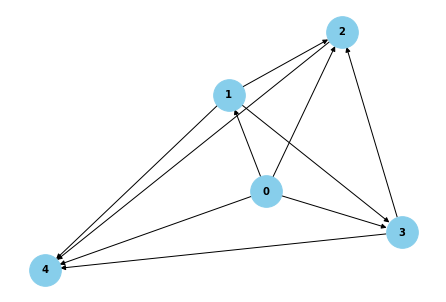

In [263]:
graph = Graph()

graph.generate_random_graph(5, 1)
graph.visualize()

In [264]:
graph.create_adjacency_matrix()
for row in graph.adjacency_matrix:
    print(row)


[0, 1, 1, 1, 1]
[0, 0, 1, 1, 1]
[0, 0, 0, 0, 1]
[0, 0, 1, 0, 1]
[0, 0, 0, 0, 0]


In [265]:
graph.create_adjacency_list()
for key, value in graph.adjacency_list.items():
    print(key, value)

0 [1, 3, 2, 4]
1 [3, 2, 4]
2 [4]
3 [2, 4]
4 []


In [266]:
graph.topological_sort()

[0, 1, 3, 2, 4]